## Wrangling the Billboard Top 100

Consider the data in [billboard.csv](/billboard.csv) containing every song to appear on the weekly [Billboard Top 100](https://www.billboard.com/charts/hot-100/) chart since 1958, up through the middle of 2021.  Each row of this data corresponds to a single song in a single week.  For our purposes, the relevant columns here are:

- performer: who performed the song
- song: the title of the song
- year: year (1958 to 2021)
- week: chart week of that year (1, 2, etc)
- week_position: what position that song occupied that week on the Billboard top 100 chart.

## Importing Libraries

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data CLeaning and Manupulation

In [4]:
df = pd.read_csv('billboard.csv')
# drop column Unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace=True)
# df.head()

In [5]:
df['week_id'] = pd.to_datetime(df['week_id'], format='%m/%d/%Y')
df['year'] = df['week_id'].dt.year

In [6]:
# checking all about the data
print(df.info())
print("\n", "WE CAN SEE THAT TOTAL ROWS ARE 327895 AND THERE ARE NO NULL VALUES EXCEPT FOR previous_week_position COLUMN 31954 ROWS ARE NULL VALUES ") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   url                     327895 non-null  object        
 1   week_id                 327895 non-null  datetime64[ns]
 2   week_position           327895 non-null  int64         
 3   song                    327895 non-null  object        
 4   performer               327895 non-null  object        
 5   song_id                 327895 non-null  object        
 6   instance                327895 non-null  int64         
 7   previous_week_position  295941 non-null  float64       
 8   peak_position           327895 non-null  int64         
 9   weeks_on_chart          327895 non-null  int64         
 10  year                    327895 non-null  int32         
 11  week                    327895 non-null  int64         
dtypes: datetime64[ns](1), float64(

__Part A__:  Make a table of the top 10 most popular songs since 1958, as measured by the _total number of weeks that a song spent on the Billboard Top 100._  Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.    

Your table should have __10 rows__ and __3 columns__: `performer`, `song`, and `count`, where `count` represents the number of weeks that song appeared in the Billboard Top 100.  Make sure the entries are sorted in descending order of the `count` variable, so that the more popular songs appear at the top of the table.  Give your table a short caption describing what is shown in the table.  

__Solution__ : If the song is on the csv then that means the song is on Billboard 100 and if we just sum the number of times one `song_id` appread on the data then we will get _total number of weeks that a song spent on the Billboard Top 100._. Then, we just 

In [7]:
# Group by performer and song, and count the occurrences of each song_id
grouped = df.groupby(['performer', 'song'])['song_id'].count().reset_index(name='count')

# Sort by the count in descending order and select the top 10
topPopularSongs = grouped.sort_values(by='count', ascending=False).head(10)  # doubt do we need to drop index column

print("Top 10 Most Popular Songs since 1958:")
topPopularSongs

Top 10 Most Popular Songs since 1958:


,performer,song,count
11194,Imagine Dragons,Radioactive,87
403,AWOLNATION,Sail,79
27121,The Weeknd,Blinding Lights,76
12026,Jason Mraz,I'm Yours,76
15008,LeAnn Rimes,How Do I Live,69
18752,OneRepublic,Counting Stars,68
14807,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
12421,Jewel,Foolish Games/You Were Meant For Me,65
506,Adele,Rolling In The Deep,65
4347,Carrie Underwood,Before He Cheats,64


__Part B__: Is the "musical diversity" of the Billboard Top 100 changing over time?  Let's find out.  We'll measure the musical diversity of given year as _the number of unique songs that appeared in the Billboard Top 100 that year._  Make a line graph that plots this measure of musical diversity over the years.  The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year.  For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years.   Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.  

There are number of ways to accomplish the data wrangling here.  For example, you could use two distinct sets of data-wrangling steps.  The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year.  The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, _irrespective of how many times_ it had appeared.

/var/folders/kg/6zcpy_5d1cv8qp9ktgjrvmrw0000gn/T/ipykernel_8878/3795557730.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excludeYears_df['year'] = excludeYears_df['week_id'].dt.year


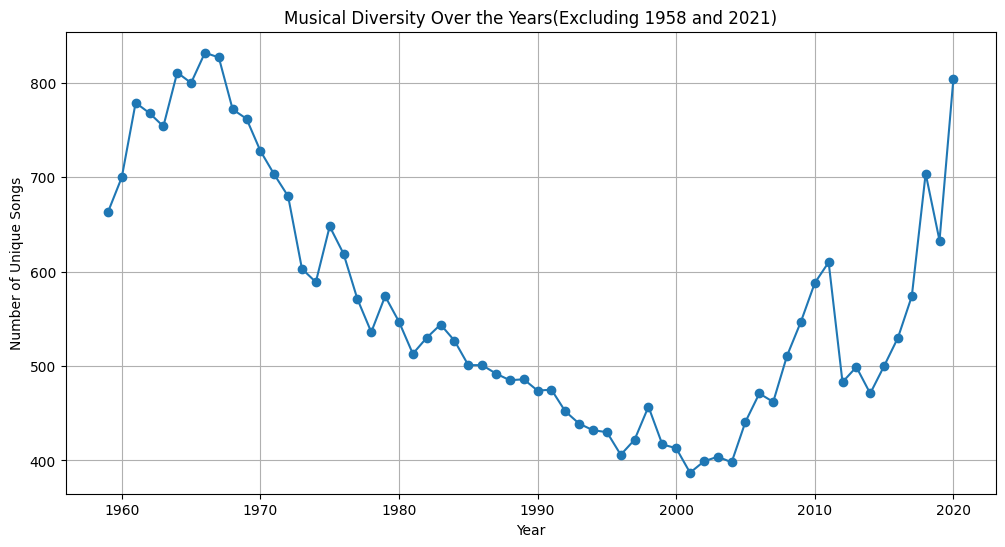

In [8]:
# Exclude the years 1958 and 2021 from the dataset
exclude = ['1958', '2021']
excludeYears_df = df[~df['year'].astype(str).isin(exclude)]

# Extract the year from week_id
excludeYears_df['year'] = excludeYears_df['week_id'].dt.year

# Calculate the number of unique songs per year
uniqueSongsPerYear = excludeYears_df.groupby('year')['song_id'].nunique().reset_index(name='unique_songs')

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(uniqueSongsPerYear['year'], uniqueSongsPerYear['unique_songs'], marker='o', linestyle='-')
plt.title('Musical Diversity Over the Years(Excluding 1958 and 2021)')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.grid(True)
plt.show()

__Part C__: Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks.  There are 19 artists in U.S. musical history since 1958 who have had _at least 30 songs_ that were "ten-week hits."  Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career.   Give the plot an informative caption in which you explain what is shown.


_Notes_:  

1) You might find this easier to accomplish in two distinct sets of data wrangling steps.
2) Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together.  If you find that your plot isn't readable with vertical bars, you can add a `coord_flip()` layer to your plot to make the bars (and labels) run horizontally instead.
3) By default a bar plot will order the artists in alphabetical order.  This is acceptable to turn in.  But if you'd like to order them according to some other variable, you can use the `fct_reorder` function, described in [this blog post](https://datavizpyr.com/re-ordering-bars-in-barplot-in-r/).  This is optional.

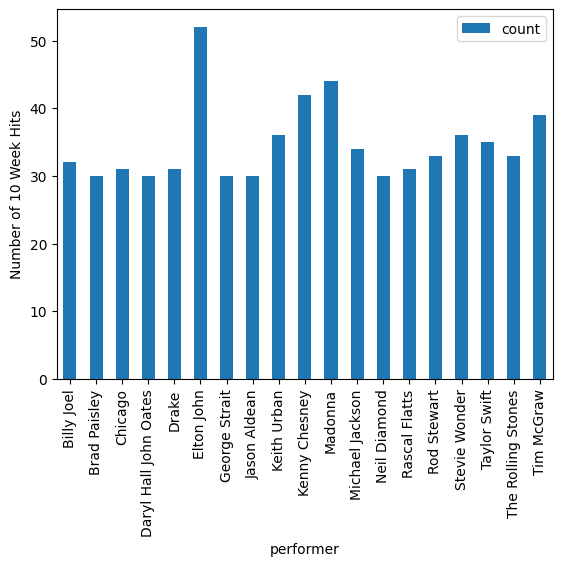

In [9]:
#c
#c
group_10wk = df.groupby(['performer', 'song']).size()
df_10wk = group_10wk.to_frame()
df_10wk.rename(columns = {'performer': 'performer' ,'song': 'song', 0: 'count'}, inplace = True)
mask = (df_10wk['count']>=10)
df_10wk = df_10wk[mask]
df_30songs = df_10wk

df_30songs = df_30songs.groupby(['performer']).size().to_frame()
df_30songs.rename(columns = {'performer':'performer', 0:'count'}, inplace = True)
mask = (df_30songs['count']>=30)
df_30songs = df_30songs[mask]
df_30songs.shape

plt = df_30songs.plot(kind='bar', ylabel = 'Number of 10 Week Hits')